In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape


(60000, 28, 28)

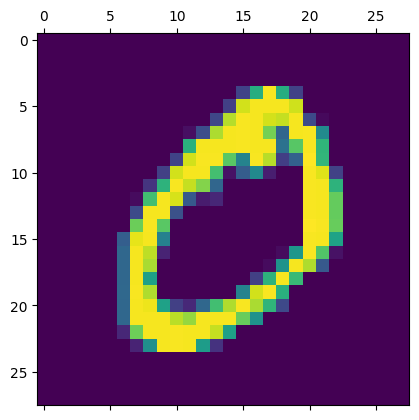

In [4]:
plt.matshow(X_train[1])

In [5]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [6]:
X_test_flattened.shape

(10000, 784)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 263us/step - accuracy: 0.8392 - loss: 9.8609 
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8781 - loss: 5.9123
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8827 - loss: 5.5641
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.8845 - loss: 5.4638
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - accuracy: 0.8864 - loss: 5.3439


In [8]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.8850 - loss: 5.9136


[5.913628101348877, 0.8849999904632568]

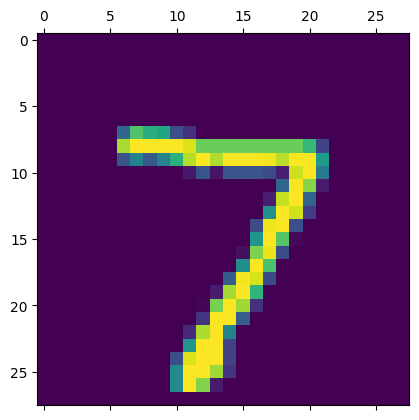

In [9]:
plt.matshow(X_test[0])

In [10]:
y_predicted= model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [11]:
print(np.argmax(y_predicted[0]))

7


In [12]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [13]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 943,    0,    0,    2,    1,   18,    8,    3,    2,    3],
       [   0, 1121,    2,    6,    0,    2,    2,    0,    2,    0],
       [   2,   30,  828,   92,    4,   11,   15,    8,   37,    5],
       [   0,    1,   14,  924,    0,   55,    1,    4,    6,    5],
       [   1,    4,    9,    9,  869,    0,   17,   13,    5,   55],
       [   6,    9,    2,   32,    7,  795,    9,    6,   22,    4],
       [   8,    3,    5,    5,    4,   37,  894,    1,    1,    0],
       [   2,   11,   21,   33,    4,    1,    1,  884,    2,   69],
       [   3,   43,    5,  102,   13,  106,    9,    6,  672,   15],
       [   6,    7,    0,   17,   22,   15,    0,   13,    9,  920]],
      dtype=int32)>

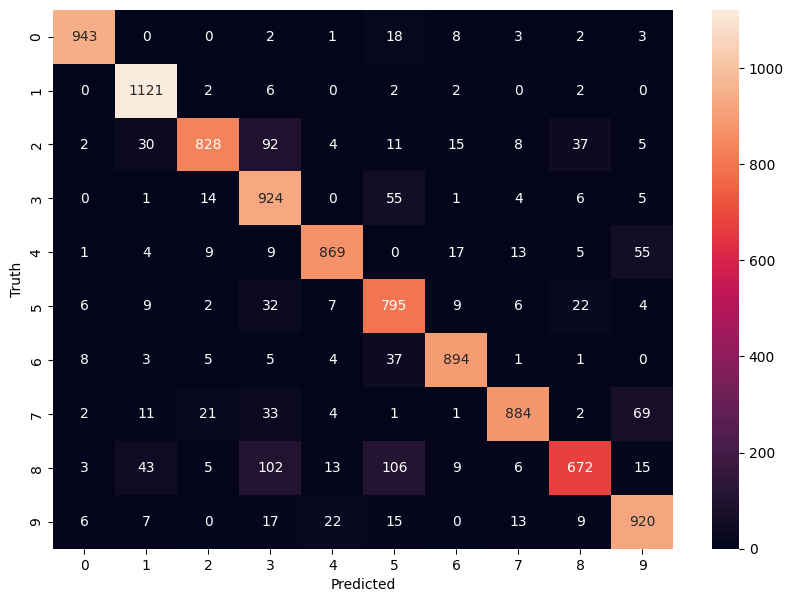

In [14]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5) 

Epoch 1/5


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.8334 - loss: 2.6735
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.9009 - loss: 0.4235
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - accuracy: 0.9222 - loss: 0.3101
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.9340 - loss: 0.2572
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.9403 - loss: 0.2336


In [16]:
model.evaluate(X_test_flattened,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - accuracy: 0.9404 - loss: 0.2542


[0.25416940450668335, 0.9404000043869019]

In [17]:
y_predicted= model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step


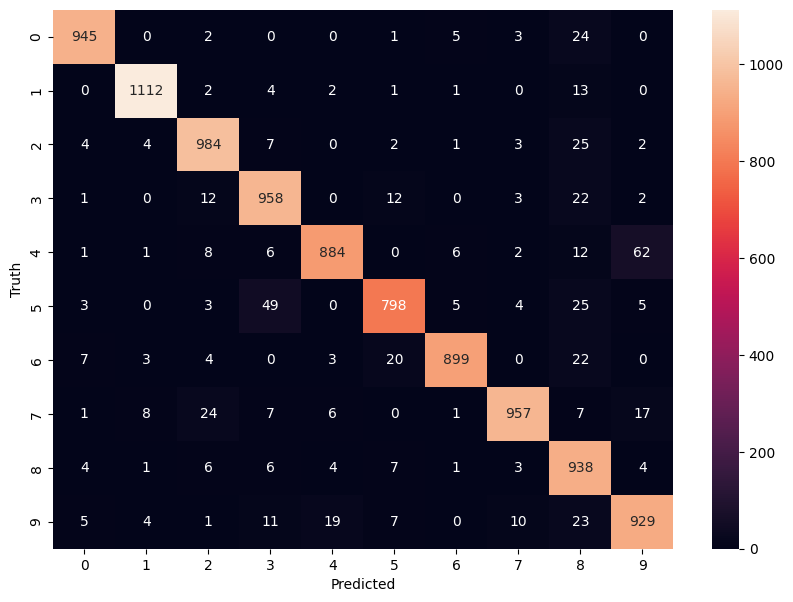

In [18]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()